In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as stats

# URL of the dataset
url = "https://richardson.byu.edu/220/neighborhood_survey.csv"

# Load the dataset
data = pd.read_csv(url)

# Display the first few rows of the dataframe
print(data.head())

file_path = "neighborhood_survey.csv"
data.to_csv(file_path, index=False)


         income   house_price        age      height     car_price  \
0  1.686915e+08  1.117484e+09  26.828250  162.723079  5.137170e+07   
1  1.153221e+08  5.881274e+08  10.374250  153.588600  1.699632e+07   
2  2.658110e+08  1.525769e+10  21.570425  148.432152  1.415462e+08   
3  6.315472e+06  2.452819e+09  36.362952  168.286582  1.055243e+08   
4  1.124220e+07  1.019097e+10  43.829227  183.382357  4.914229e+07   

   education_years  work_hours  social_media_followers  screen_time  \
0        15.663517   38.613805           145576.854228   149.925895   
1        18.076600   38.711946           264772.717688   206.585089   
2         9.587076   45.871163            50686.001524   153.330014   
3        17.332708   39.898447           125534.745026   149.508669   
4        15.672139   34.653167           160203.229268   182.673401   

   vacation_expenditure  
0          3.542033e+06  
1          1.172654e+06  
2          1.909575e+06  
3          1.576310e+06  
4          1.050240e+0

In [ ]:
#(a)
means = data.mean()
std_devs = data.std()

print(means)
print(std_devs)

income                    2.059959e+08
house_price               4.967880e+09
age                       3.483779e+01
height                    1.679929e+02
car_price                 5.064881e+07
education_years           1.598509e+01
work_hours                4.011430e+01
social_media_followers    2.014321e+05
screen_time               1.785814e+02
vacation_expenditure      5.039727e+06
dtype: float64
income                    2.008809e+08
house_price               4.927759e+09
age                       9.858756e+00
height                    1.009275e+01
car_price                 5.014014e+07
education_years           2.954505e+00
work_hours                7.154578e+00
social_media_followers    2.007449e+05
screen_time               3.898044e+01
vacation_expenditure      5.072516e+06
dtype: float64


In [ ]:
#b
for column in data.columns:
    mean = means[column]
    std_dev = std_devs[column]
    within_1_std = data[column].apply(lambda x: mean - std_dev <= x <= mean + std_dev).mean() * 100
    within_2_std = data[column].apply(lambda x: mean - 2*std_dev <= x <= mean + 2*std_dev).mean() * 100

    print(f"{column}:")
    print(f"Mean (MLE): {mean}")
    print(f"Standard Deviation (MLE): {std_dev}")
    print(f"Within 1 standard deviation: {within_1_std}%")
    print(f"Within 2 standard deviations: {within_2_std}%")
    print()


income:
Mean (MLE): 205995854.82936555
Standard Deviation (MLE): 200880871.31822786
Within 1 standard deviation: 84.89999999999999%
Within 2 standard deviations: 94.5%

house_price:
Mean (MLE): 4967879846.97569
Standard Deviation (MLE): 4927758821.960818
Within 1 standard deviation: 85.1%
Within 2 standard deviations: 93.89999999999999%

age:
Mean (MLE): 34.837791719201924
Standard Deviation (MLE): 9.858756140024424
Within 1 standard deviation: 67.30000000000001%
Within 2 standard deviations: 95.19999999999999%

height:
Mean (MLE): 167.99290152978628
Standard Deviation (MLE): 10.092754878184449
Within 1 standard deviation: 69.5%
Within 2 standard deviations: 95.1%

car_price:
Mean (MLE): 50648807.33975265
Standard Deviation (MLE): 50140141.44051384
Within 1 standard deviation: 85.0%
Within 2 standard deviations: 95.1%

education_years:
Mean (MLE): 15.985085349984507
Standard Deviation (MLE): 2.9545052339805347
Within 1 standard deviation: 68.5%
Within 2 standard deviations: 95.3%

work

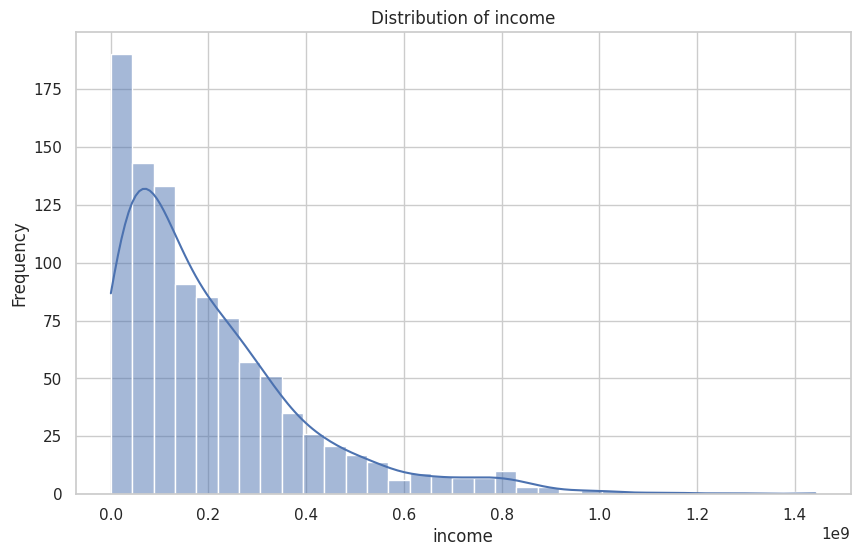

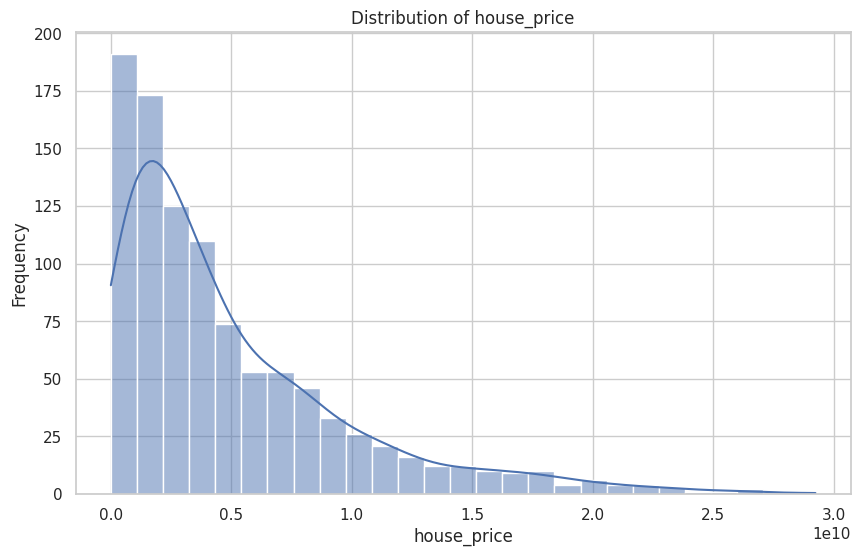

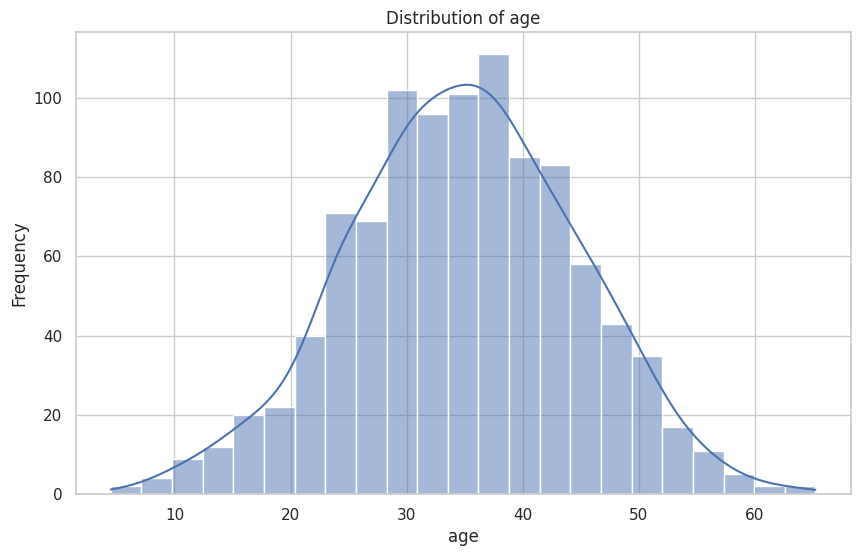

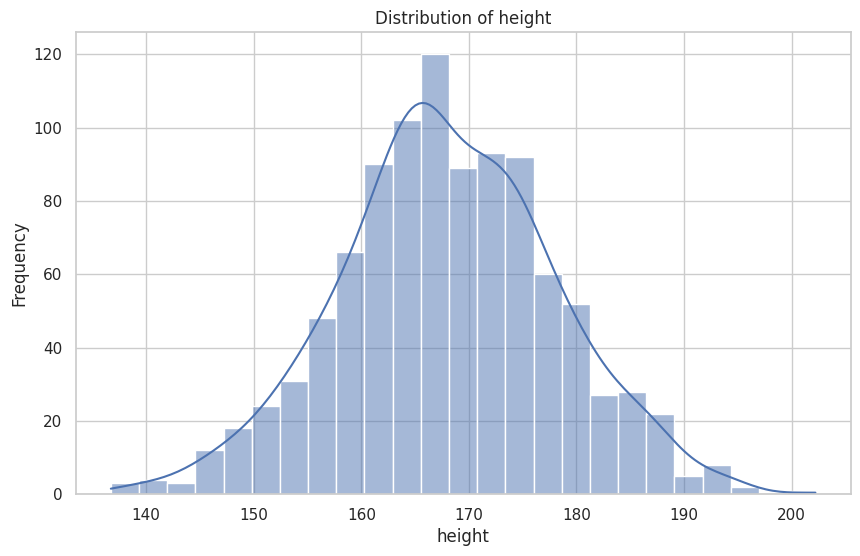

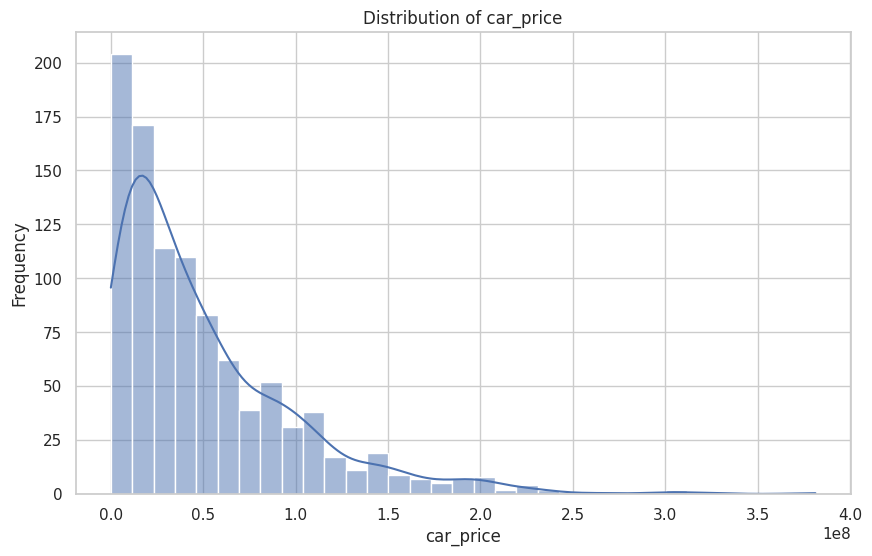

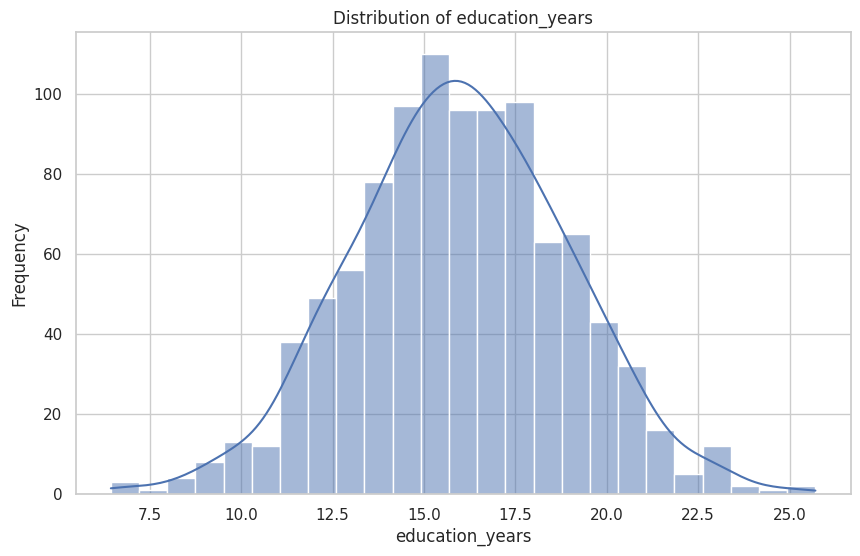

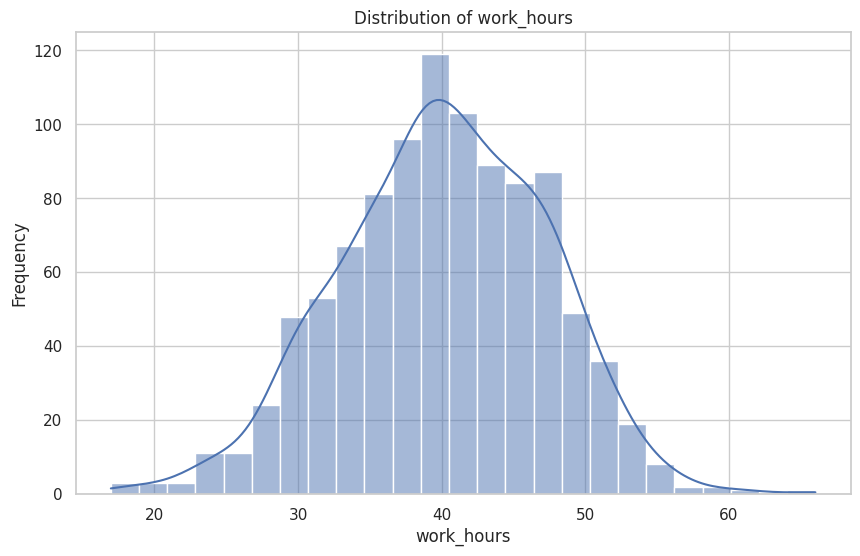

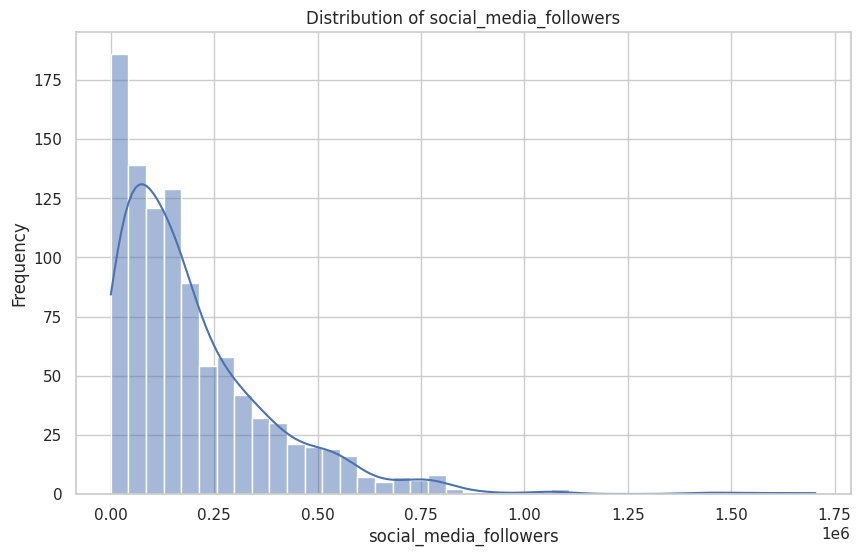

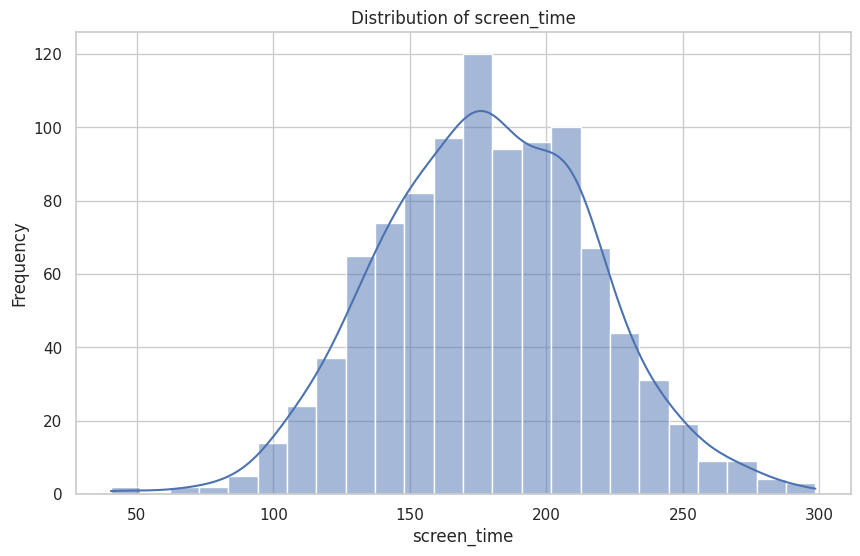

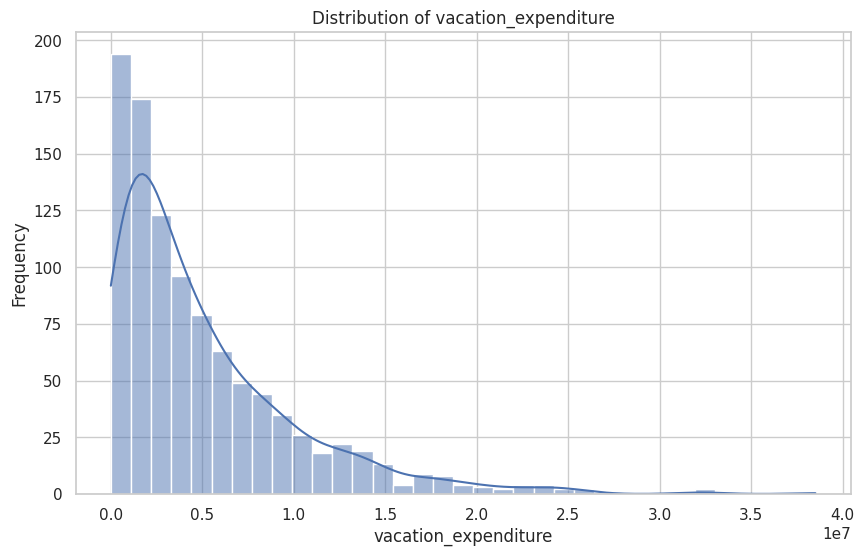

In [ ]:
# Set style
sns.set(style="whitegrid")

for column in data.columns:
    plt.figure(figsize=(10, 6))

    # Histogram
    sns.histplot(data[column], kde=True)

    plt.title(f'Distribution of {column}')
    plt.xlabel(column)
    plt.ylabel('Frequency')
    plt.show()

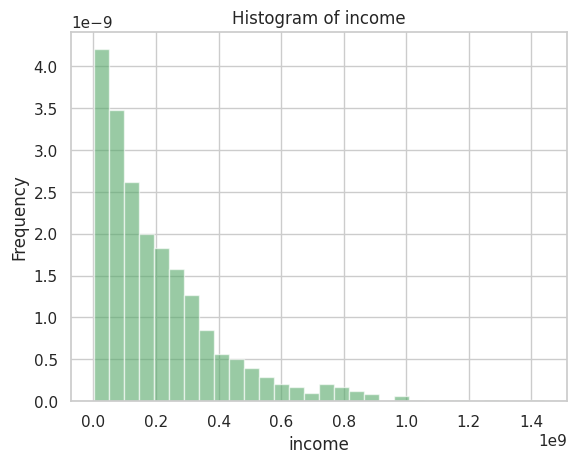

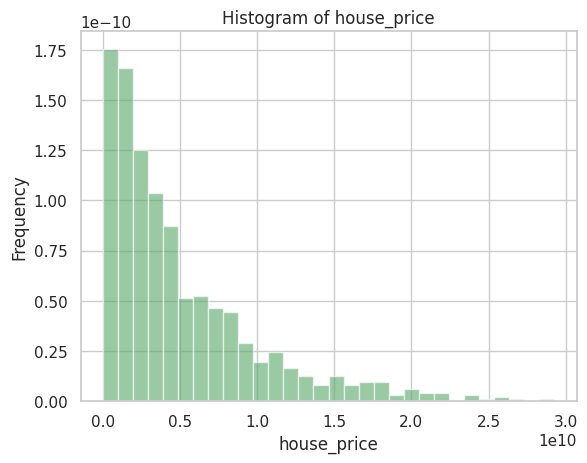

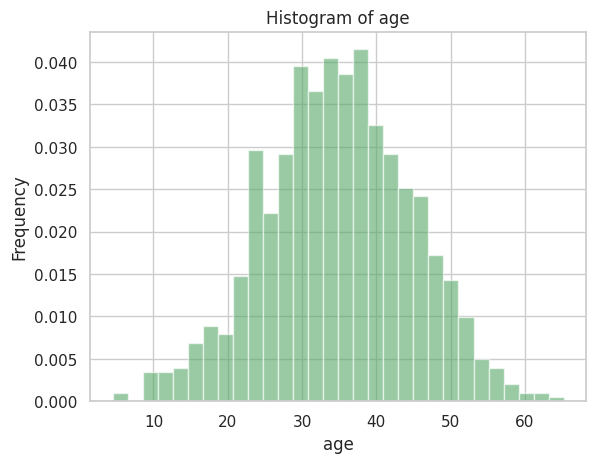

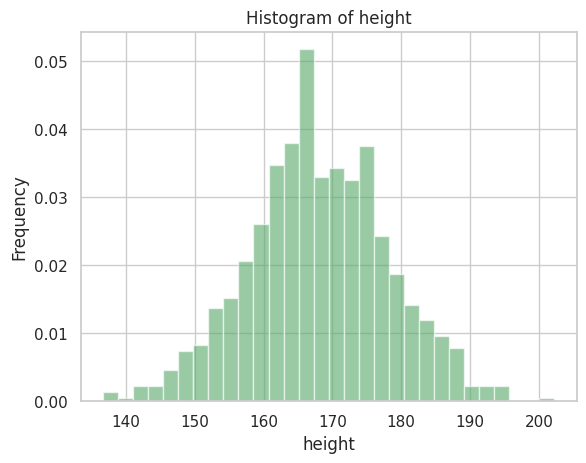

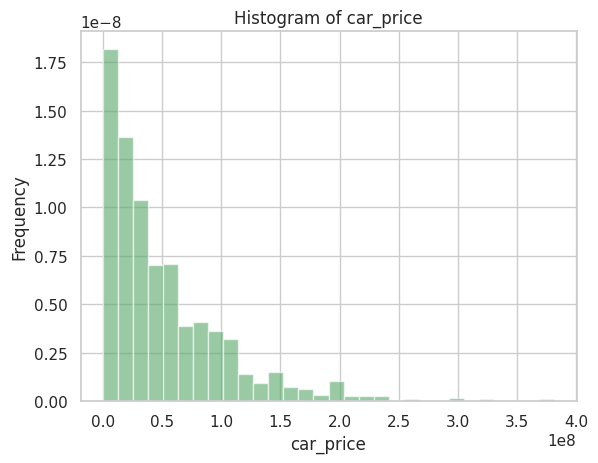

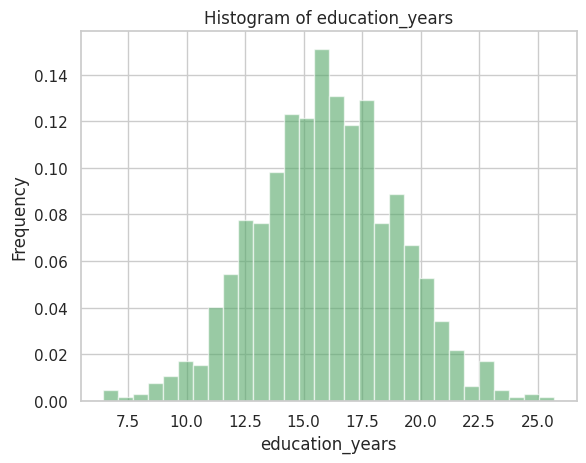

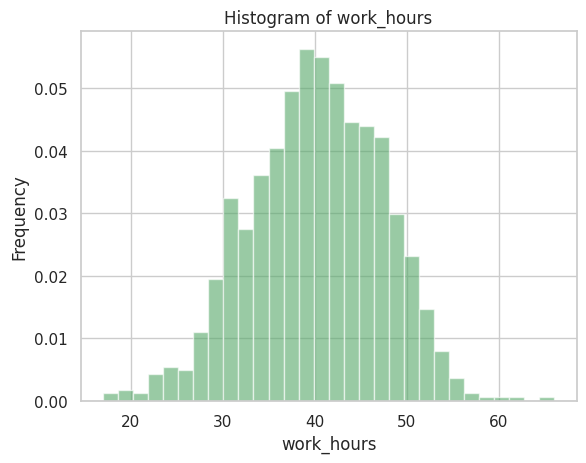

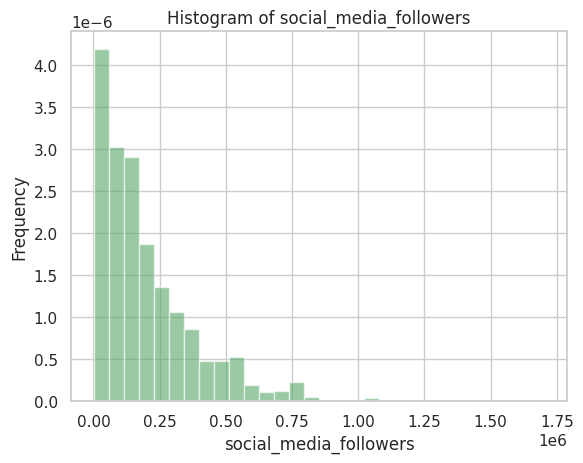

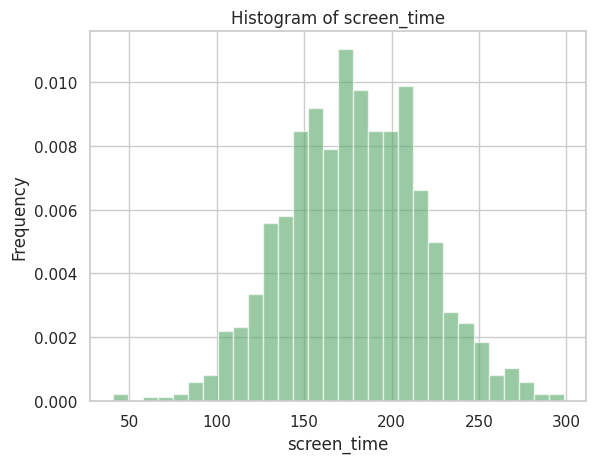

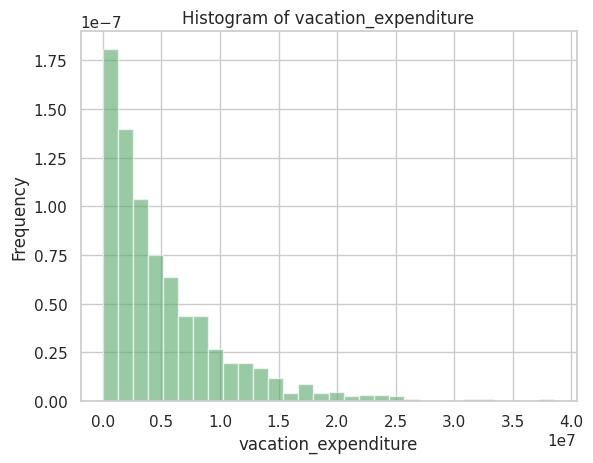

                 Variable    Mean (MLE)  Standard Deviation (MLE)  \
0                  income  2.059959e+08              2.008809e+08   
1             house_price  4.967880e+09              4.927759e+09   
2                     age  3.483779e+01              9.858756e+00   
3                  height  1.679929e+02              1.009275e+01   
4               car_price  5.064881e+07              5.014014e+07   
5         education_years  1.598509e+01              2.954505e+00   
6              work_hours  4.011430e+01              7.154578e+00   
7  social_media_followers  2.014321e+05              2.007449e+05   
8             screen_time  1.785814e+02              3.898044e+01   
9    vacation_expenditure  5.039727e+06              5.072516e+06   

   Within 1 standard deviation  Within 2 standard deviations  \
0                         84.9                          94.5   
1                         85.1                          93.9   
2                         67.3                  

In [ ]:
# Load the dataset
file_path = "neighborhood_survey.csv"
data = pd.read_csv(file_path)

# Initialize lists to store results
results = []

# Iterate through each variable in the dataset
for column in data.columns:
    # Calculate the mean and standard deviation
    mean = data[column].mean()
    std_dev = data[column].std()

    # Calculate the percentage of data falling within 1 and 2 standard deviations
    within_1_std = data[column].between(mean - std_dev, mean + std_dev).mean() * 100
    within_2_std = data[column].between(mean - 2*std_dev, mean + 2*std_dev).mean() * 100

    # Conduct a Shapiro-Wilk normality test
    _, p_value = stats.shapiro(data[column])
    is_normal = "Yes" if p_value > 0.05 else "No"  # p-value threshold 0.05

    # Append results to the list
    results.append({
        "Variable": column,
        "Mean (MLE)": mean,
        "Standard Deviation (MLE)": std_dev,
        "Within 1 standard deviation": within_1_std,
        "Within 2 standard deviations": within_2_std,
        "Normal based on Shapiro-Wilk Test": is_normal
    })

    # Plot histogram for each variable
    plt.hist(data[column], bins=30, density=True, alpha=0.6, color='g')
    plt.title(f'Histogram of {column}')
    plt.xlabel(column)
    plt.ylabel('Frequency')
    plt.show()

# Convert the results list to a DataFrame and display it
results_df = pd.DataFrame(results)
print(results_df)
